In [109]:
import requests, io, os, glob

In [110]:
folder_dict = {'test' :'Topic Modelling AR new'}
text_dict = {'test' : {}}
print(os.getcwd())
ds_store_file_location = '/Users/aberkin/Topic Modelling AR new/.DS_store'
if os.path.isfile(ds_store_file_location):
    os.remove(ds_store_file_location)

/Users/aberkin


In [111]:
for label, folder in folder_dict.items():
    authors = os.listdir(folder)
    for author in authors:
        text_files = os.listdir(os.path.join(folder, author))
        for file in text_files:
            with open(os.path.join(folder, author, file), 'r', encoding="utf8", errors='ignore') as text_file:
                text_dict[label].setdefault(author, []).append(' '.join(text_file.readlines()))

In [112]:
root = "/Users/aberkin/Topic Modelling AR new"
for item in os.listdir(root):
    if not item.startswith('.') and os.path.isfile(os.path.join(root, item)):
        print(item)
        

ds_store_file_location = '/Users/aberkin/Topic Modelling AR new'
if os.path.isfile(ds_store_file_location):
    os.remove(ds_store_file_location)

In [113]:
#TEXT PREPROCESSING
import nltk
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stemmer = PorterStemmer()
#stemmer = SnowballStemmer("english", ignore_stopwords=True)
stop_words=set(stopwords.words("english"))
import en_core_web_sm
parser = en_core_web_sm.load()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aberkin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
spacy_text = {}
for author, text_list in text_dict['test'].items():
    spacy_text[author] = [parser(text) for text in text_list]

In [115]:
spacy_sentences = {}
for author, text_list in spacy_text.items():
    spacy_sentences[author] = [list(text.sents) for text in text_list]

In [116]:
type(spacy_sentences)


dict

In [117]:
def process_text_custom(text):
    sentences = list(parser(text).sents)
    stemmed_sentences = []
    for sentence in sentences:
        #lemmatized_sentences.append([token.lemma_ for token in sentence if not token.is_stop | token.is_punct | token.is_space])
        #stemmed_sentences.append([stemmer.stem(token.text) for token in sentence if not token.is_stop | token.is_punct | token.is_space | token.is_digit| token.like_num])
                #WITH STOP WORDS
       # stemmed_sentences.append([stemmer.stem(token.text) for token in sentence if not token.is_punct | token.is_space | token.is_digit| token.like_num])
        stemmed_sentences.append([stemmer.stem(token.text) for token in sentence if not token.is_punct | token.is_space | token.is_digit| token.like_num])
    return [parser(' '.join(sentence)) for sentence in stemmed_sentences]


In [118]:
%%time
spacy_text_clean = {}
for author, text_list in text_dict['test'].items():
    lst = []
    for text in text_list:      
        lst.append(process_text_custom(text))
    spacy_text_clean[author] = lst

CPU times: user 17min 42s, sys: 20.6 s, total: 18min 3s
Wall time: 18min 26s


In [119]:
count = 0
for author, texts in spacy_text_clean.items():
    for text in texts:
        count += len(text)
print('Number of sentences:', count)

Number of sentences: 148573


In [120]:
#print(spacy_text_clean[0])

In [121]:
#TFIDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

In [122]:
clean_paragraphs = []
for author, value in spacy_text_clean.items():
    for article in value:
        clean_paragraphs.append(' '.join([x.text for x in article]))

In [123]:
print(clean_paragraphs[422])

deliv for the futur our vision thoma f. farrel ii chairman presid and chief execut ofﬁcer dear investor america ’s singular focu dure as it should have been seem to be on the presidenti elect the candid display bright line differ on among other thing the state of the u.s. economi the statu of foreign war health care and job import issu wa notabl absent from the debat the candid paid scant attent to energi polici but voter in our servic area receiv an educ in real time about the import of reliabl safe power in late june summer storm swept through the midwest and mid atlant result in massiv power outag in for instanc virginia then just day befor the elect superstorm sandi roar into the northeast leav in it path unimagin suffer and devast norfolk va light up the night sky courtesi of dominion virginia power the citi home to is part of a popul rich region that boast the world ’s largest naval base in a word wa deﬁn by weather whether stormi or mild mother natur had an enorm impact on your 

In [124]:
clean_paragraphs = [item.replace("cid", "") for item in clean_paragraphs]
# clean_paragraphs = [item.replace("wa", "") for item in clean_paragraphs]
# clean_paragraphs = [item.replace("ha", "") for item in clean_paragraphs]
# clean_paragraphs = [item.replace("tt", "") for item in clean_paragraphs]
# clean_paragraphs = [item.replace("ve", "") for item in clean_paragraphs]
# clean_paragraphs = [item.replace("thi", "") for item in clean_paragraphs]

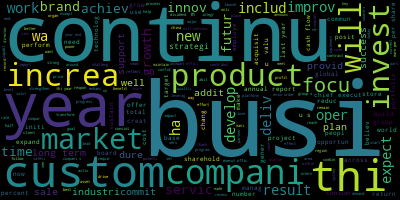

In [125]:
# #listelist = text_dict['test']['performance']

from wordcloud import WordCloud

long_string= ','.join(clean_paragraphs)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud = WordCloud().generate(long_string)
wordcloud.to_image()

# plt.figure( figsize=(20,10) )
# plt.imshow(wordcloud)



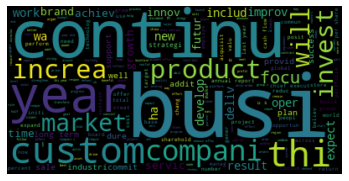

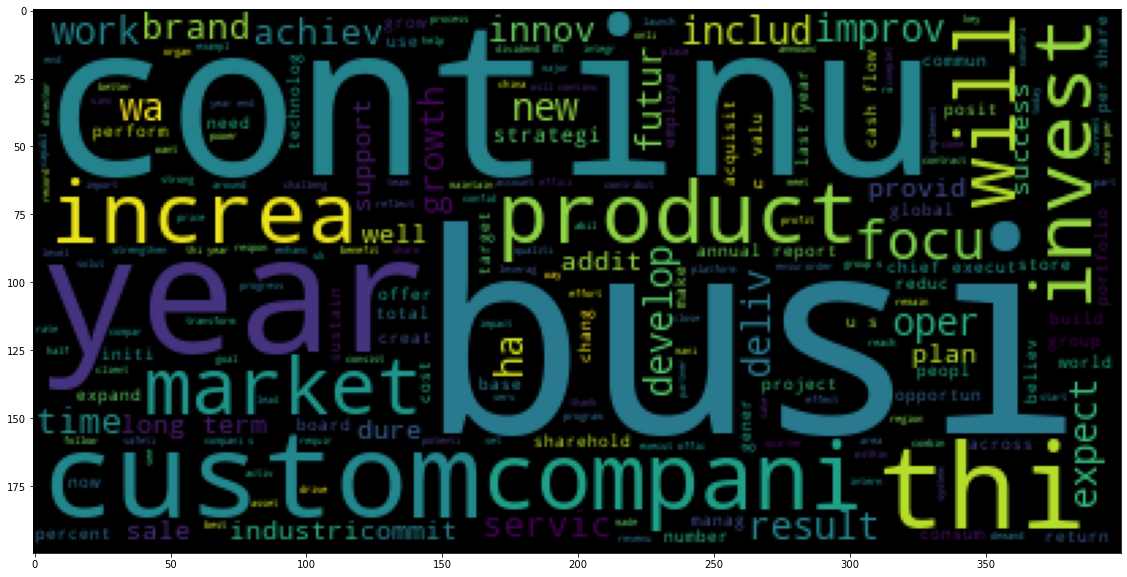

In [126]:
from matplotlib import pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [127]:
#words = [w.replace('\n', '') for w in listelist]
#words2 = [w.replace('(', '') for w in words]
#words3 = [w.replace(')', '') for w in words2]

In [128]:
#from textstat.textstat import textstat

#type(words3)
#name = glob.glob('/home/aberkin/Step 1/performance/*.txt')

#type(name) 

#print(words3)

In [129]:
#print(textstat.gunning_fog(words3[4]))

    
    
#for w in words3:
#    print(textstat.gunning_fog(w))

In [130]:
#name


#print(textstat.gunning_fog('A culture that delivers sustainable growth The Mondi Way is our framework for creating sustainable value founded on our three core values of acting with integrity, being passionate about performance, and caring about the world and each other. Our vision, which Peter Oswald expands on in his Chief Executive Officers letter, explains our future aspirations in line with our strategy. We appreciate the trust our shareholders place in us to generate industry-leading returns, while contributing to society and minimising our impact on the environment. This includes supporting local communities; ensuring a safe, fair, diverse and inclusive working environment; and helping employees, customers and suppliers to realise their full potential. Acting with integrity  The boards of Mondi Limited and Mondi plc support the highest standards of corporate governance with a focus on transparency, honesty and accountability. Our governance framework is designed to guide our behaviour in all areas of decisionmaking, keeping our culture and values at the forefront when we consider how best to achieve our strategy. By acting with integrity we can balance our passion for performance and our commitment to achieving long-term shareholder value with the diverse needs of all our stakeholders. Our directors dedicate time to reviewing best-practice developments, assessing performance and optimising Mondis approach. We regularly review our governance framework and practices to ensure they remain relevant, and we update policies and procedures as required.'))

In [131]:
#weights = np.asarray(tfidf_large.mean(axis=0)).ravel().tolist()
#weights_df = pd.DataFrame({'term': transformer.get_feature_names(), 'weight': weights})
#weights_df.sort_values(by='weight', ascending=False).head(10)

In [132]:
#vectorizer = TfidfVectorizer(stop_words='english') #min_df = 5
#tf = vectorizer.fit_transform(clean_paragraphs)

In [133]:
# occ = np.asarray(tf.sum(axis=0)).ravel().tolist()
# counts_cv = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences': occ})
# counts_cv.sort_values(by='occurrences', ascending=False).head(10)


In [134]:
# weights = np.asarray(tf.mean(axis=0)).ravel().tolist()
# weights_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'weight': weights})
# weights_df.sort_values(by='weight', ascending=False).head(10)

In [135]:
#TRAIN VS TEST DATA

In [136]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
#from sklearn.externals import joblib

In [137]:
article_list = []
for author, value in spacy_text_clean.items():
    for article in value:
        article_list.append((author, ' '.join([x.text for x in article])))

In [138]:
article_df = pd.DataFrame(article_list, columns=['author', 'text'])


In [139]:
#article_df.sample

In [140]:
#X_train, X_test, y_train, y_test = train_test_split(article_df.text, article_df.author, test_size=0.15,random_state=3561)
# # #independent variable : X (dosyalar), dependent : Y (klasorler)
#print(len(X_train), len(X_test))

In [141]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10,random_state=3561)
# print(len(X_train), len(X_val)) - deleted here because no validation set is needed when cross-validation is used. 

In [142]:
# from imblearn.over_sampling import SMOTE 

# # oversample = SMOTE()
# # X_train, y_train = oversample.fit_resample(X_train, y_train)

# sm = SMOTE(sampling_strategy = 1)
# X_trainS, y_trainS = sm.fit_sample(vectorized_text, y_train)

In [143]:
# X=article_df.text
# y=article_df.author
# kf= KFold(n_splits=10,random_state=None)
# kf.get_n_splits(X)

# print(kf)

In [144]:
# KFold(n_splits=10, random_state=None, shuffle=False)

In [145]:
#for train_index, test_index in kf.split(X):
    # print("Train:", train_index, "Test:", test_index)
    # X_train, X_test = X[train_index], X[test_index]
    # y_train, y_test = y[train_index], y[test_index]

In [146]:
#MACHINE LEARNING - SUPERVISED

In [147]:
# def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
#     clf.fit(X_train, y_train)
    
#     print("Accuracy on training set:")
#     print(clf.score(X_train, y_train))
#     print("Accuracy on testing set:")
#     print(clf.score(X_test, y_test))
#     y_pred = clf.predict(X_test)
    
#     print("Classification Report:")
#     print(metrics.classification_report(y_test, y_pred))
    
    
     

In [148]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score

In [149]:
#Naive Bayes
# from sklearn.naive_bayes import MultinomialNB

In [150]:
# clf_search = Pipeline([
#      ('vect', TfidfVectorizer()),
#      ('clf', MultinomialNB())
#  ])
# parameters = { 'vect__stop_words': ['english'],
#                  'vect__strip_accents': ['unicode'],
#                'vect__max_features' : [None, 1500, 5000],
#                'vect__ngram_range': [(1,1), (1,2) ],
#               # 'vect__max_df' : [(0.90), (0.80), (0.70)],
#              #  'vect__min_df' : [(0.20), (0.10), (0.05)],
#               'clf__alpha' : [0.01, 0.1, 1.0], 
#               'clf__fit_prior' : ['True', 'False']
#               }


In [151]:
# sm = SMOTE(sampling_strategy = 0.7)
# train_x_res, train_y_res = sm.fit_sample(X_train, y_train)

In [152]:
# %%time
# grid = GridSearchCV(clf_search, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
# grid.fit(X_train, y_train)



In [153]:
# print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
# y_true, y_pred = y_test, grid.predict(X_test)
# print(metrics.classification_report(y_true, y_pred))

In [154]:
# from sklearn.metrics import confusion_matrix

# conf_mat = confusion_matrix(y_true, y_pred)

# print(conf_mat)
# print(len(X_train), len(X_test))

# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# print(tn, fp, fn, tp)


In [155]:
#from sklearn.metrics import roc_auc_score
#print(metrics.roc_auc_score(y_true, y_pred, average='macro', sample_weight=None, multi_class='raise', labels=None))

In [156]:
# clf = Pipeline([
#    ('vect', TfidfVectorizer(strip_accents='unicode',
#                             lowercase = True,
#                            max_features = 1500,
#                           stop_words='english',
#                             ngram_range=(1,2)
#                            )),
#     ('clf', MultinomialNB(alpha=0.1, fit_prior=True))
# ])

In [157]:
# train_and_evaluate(clf, X_train, X_test, y_train, y_test)

In [158]:
# cross_val_score(clf, article_df.text, article_df.author, cv=10, scoring='accuracy')
# cross_val_score(clf, X=X_train, y=y_train, cv=10, scoring='accuracy')

In [159]:
#example_y, example_X = y_train[71], X_train[71]


In [160]:
#print('Actual author:', example_y)
#print('Predicted author:', clf.predict([example_X])[0])

In [161]:
# #Logistic Regression
from sklearn.linear_model import LogisticRegression

In [162]:
#  clf_search = Pipeline([
#      ('vect', TfidfVectorizer()),
#      ('clf', LogisticRegression())
#  ])
# parameters = { 'vect__stop_words': ['english'],
#                  'vect__strip_accents': ['unicode'],
#                'vect__max_features' : [None, 1500, 5000],
#                'vect__ngram_range': [(1,1), (1,2) ],
#                # 'vect__max_df' : [(0.90), (0.80), (0.70)],
#                #'vect__min_df' : [(0.20), (0.10), (0.05)],
#               'clf__random_state' : [0, 42, 100], 
#               'clf__solver' : ['lbfgs', 'newton-cg', 'sag', 'saga'],
#                'clf__multi_class' : ['multinomial', 'ovr']
#               }


In [163]:
# %%time
# grid = GridSearchCV(clf_search, param_grid=parameters, scoring='accuracy', cv=10, n_jobs= -1)
# grid.fit(X_train, y_train)

In [164]:
# from sklearn.metrics import accuracy_score

# print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
# y_true, y_pred = y_test, grid.predict(X_test)
# print(metrics.classification_report(y_true, y_pred))
# print(accuracy_score(y_true, y_pred))


In [165]:
# from sklearn.metrics import confusion_matrix

# conf_mat = confusion_matrix(y_true, y_pred)

# print(conf_mat)
# print(len(X_train), len(X_test))

# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# print(tn, fp, fn, tp)


In [166]:
#clf_lr = Pipeline([
 #   ('vect', TfidfVectorizer(strip_accents='unicode',
  #                           lowercase = True,
 #                           max_features = 1500,
  #                          stop_words='english',
  #                           #max_df = 0.80,
  #                           #min_df = 0.20
  #                          )),
 #   ('clf', LogisticRegression(random_state=0, solver='saga',
 #                              multi_class='multinomial')
 #   )
#])

In [167]:
#train_and_evaluate(clf_lr, X_train, X_test, y_train, y_test)

In [168]:
#cross_val_score(clf_lr, article_df.text, article_df.author, cv=10, scoring='accuracy')
#cross_val_score(clf_lr, X=X_train, y=y_train, cv=10, scoring='accuracy')

In [169]:
#example_y, example_X = y_train[0], X_train[0]

In [170]:
#print('Actual author:', example_y)
#print('Predicted author:', clf_lr.predict([example_X])[0])

In [171]:
# # #Random Forest Classifier
# from sklearn.ensemble import RandomForestClassifier

In [172]:
# clf_search = Pipeline([
#      ('vect', TfidfVectorizer()),
#      ('clf', RandomForestClassifier())
#  ])
# parameters = { 'vect__stop_words': ['english'],
#                  'vect__strip_accents': ['unicode'],
#                'vect__max_features' : [None, 1500, 5000],
#                'vect__ngram_range': [(1,1), (1,2) ],
#                #'vect__max_df' : [(0.90), (0.80), (0.70)],
#               # 'vect__min_df' : [(0.20), (0.10), (0.05)],
#               'clf__n_estimators' : [ 10, 100, 1000 ], 
#               'clf__max_depth' : [ None, 5, 10, 100, 1000]
#               }


In [173]:
# %%time
# grid = GridSearchCV(clf_search, param_grid=parameters, scoring='accuracy', cv=10, n_jobs= -1)
# grid.fit(X_train, y_train)

In [174]:
# print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
# y_true, y_pred = y_test, grid.predict(X_test)
# print(metrics.classification_report(y_true, y_pred))

In [175]:
# clf_rf = Pipeline([
#    ('vect', TfidfVectorizer(strip_accents='unicode',
#                             lowercase = True,
#                            max_features = 1500,
#                            stop_words='english',
#                             #max_df = 0.80,
#                              min_df = 0.20
#                            )),
#    ('clf', RandomForestClassifier(n_estimators=1000, max_depth=100,)
#                                    random_state=0) 
#    )
# ])

In [176]:
# #train_and_evaluate(clf_rf, X_train, X_test, y_train, y_test)
# from sklearn.metrics import confusion_matrix

# conf_mat = confusion_matrix(y_true, y_pred)

# print(conf_mat)
# print(len(X_train), len(X_test))

# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# print(tn, fp, fn, tp)


In [177]:
#cross_val_score(clf_rf, article_df.text, article_df.author, cv=10, scoring='accuracy')
#cross_val_score(clf_rf, X=X_train, y=y_train, cv=10, scoring='accuracy')

In [178]:
#example_y, example_X = y_train[0], X_train[0]

In [179]:
#print('Actual author:', example_y)
#print('Predicted author:', clf_lr.predict([example_X])[0])

In [180]:
# #Support vector classification
# from sklearn.svm import SVC

In [181]:
# clf_search = Pipeline([
#     ('vect', TfidfVectorizer()),
#     ('clf', SVC())
# ])
# parameters = { 'vect__stop_words': ['english'],
#                  'vect__strip_accents': ['ascii'],
#                'vect__max_features' : [None, 1500, 5000],
#                'vect__ngram_range': [(1,1), (1,2) ],
#                 #'vect__max_df' : [(0.98), (0.95), (0.90), (0.80), (0.70)],
#                #'vect__min_df' : [(0.20), (0.10), (0.05), (0.02)],
#               'clf__gamma' : [0.01, 0.1, 1], 
#              'clf__C' : [1, 8, 12, 64],
#               'clf__kernel' : ['rbf', 'linear']
#              }

In [182]:
# %%time
# grid = GridSearchCV(clf_search, param_grid=parameters, scoring='accuracy', cv=10, n_jobs= -1)
# grid.fit(X_train, y_train)

In [183]:
# print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
# y_true, y_pred = y_test, grid.predict(X_test)
# print(metrics.classification_report(y_true, y_pred))

In [184]:
# #grid.predict(["I am pleased to present my second report for 1Spatial plc, for the year ended 31 January 2018."])
# from sklearn.metrics import confusion_matrix

# conf_mat = confusion_matrix(y_true, y_pred)

# print(conf_mat)
# print(len(X_train), len(X_test))

# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# print(tn, fp, fn, tp)



In [185]:
# folder_dict2 = {'test' : 'HierExt'}  #winf for windows
# text_dict2 = {'test' : {}}

In [186]:
# for label, folder in folder_dict2.items():
#     authors = os.listdir(folder)
#     for author in authors:
#         text_files2 = os.listdir(os.path.join(folder, author))
#         for file in text_files2:
#             with open(os.path.join(folder, author, file), 'r', encoding='utf-8', errors='ignore') as text_file:  #windows-1250 for win #utf-16 for uni
#                 text_dict2[label].setdefault(author, []).append(' '.join(text_file.readlines()))

In [187]:
#name = glob.glob('/home/aberkin/PR only performance/1/*.txt')
#name

In [188]:
#text_dict2['test']['1'][0]

In [189]:
# spacy_text2 = {}
# for author, text_list in text_dict2['test'].items():
#     spacy_text2[author] = [parser(text) for text in text_list]
    
# #type(spacy_text2['Bad Performing Companies'][0])

In [190]:
# spacy_sentences2 = {}
# for author, text_list in spacy_text2.items():
#     spacy_sentences2[author] = [list(text.sents) for text in text_list]

In [191]:
#spacy_sentences2['Bad Performing Companies'][1][:3]

In [192]:
# def process_text_custom2(text):
#     sentences = list(parser(text).sents)
#     stemmed_sentences = []
#     for sentence in sentences:
        
#         #lemmatized_sentences.append([token.lemma_ for token in sentence if not token.is_stop | token.is_punct | token.is_space])
#         stemmed_sentences.append([stemmer.stem(token.text) for token in sentence if not token.is_stop | token.is_punct | token.is_space | token.is_digit| token.like_num])
#     return [parser(' '.join(sentence)) for sentence in stemmed_sentences]


In [193]:
# %%time
# spacy_text_clean2 = {}
# for author, text_list in text_dict2['test'].items():
#     lst = []
#     for text in text_list:      
#         lst.append(process_text_custom2(text))
#     spacy_text_clean2[author] = lst

In [194]:
# count = 0
# for author, texts in spacy_text_clean2.items():
#     for text in texts:
#         count += len(text)
# print('Number of sentences:', count)

In [195]:
#spacy_text_clean2['1'][0][:1]

In [196]:
#article_list2 = []
#for author, value in spacy_text_clean2.items():
#    for article in value:
#        los = [x.text for x in article]
#        scores=grid.predict(los)
#        article_list2.append((scores, ' '.join(los)))
        
        #los = [x.text for x in article]
        #scores=grid.predict(los)
        #for key in sorted(scores):
        #    print('{0}: {1}, '.format(key, scores[key]), end='')
        #print()
       # article_list2.append((article, ' '.join)(los)

In [197]:
#type(scores)

In [198]:
# article_list2 = []
# for author, value in spacy_text_clean2.items():
#     for article in value:
#         los = [x.text for x in article]
#         scores=grid.predict(los)
#         scores=scores.tolist()
#         for i in range(len(los)):
#             print(scores[i:i+1],los[i:i+1])
#         #print(los,scores)

In [199]:
#cross_val_score(clf_svm, article_df.text, article_df.author, cv=10, scoring='accuracy')
#cross_val_score(clf_svm, X=X_train, y=y_train, cv=10, scoring='accuracy')

In [200]:
#example_y, example_X = y_train[0], X_train[0]

In [201]:
#print('Actual author:', example_y)
#print('Predicted author:', clf_svm.predict([example_X])[0])

In [202]:
#UNSUPERVISED 
#LDA TOPIC MODELLING

In [203]:
from sklearn.decomposition import LatentDirichletAllocation

In [204]:
vectorizer = CountVectorizer(strip_accents='unicode',
                             lowercase = True,
                            max_features = 1500, max_df=0.90, min_df=0.10, stop_words ='english')
                            #ngram_range = (1,2))
                            #stop_words='english')#, #max_df=0.8, min_df=0.1)
tf_large = vectorizer.fit_transform(clean_paragraphs)


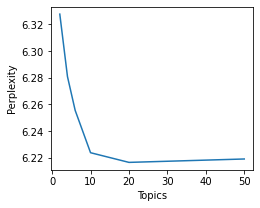

In [205]:
n_topics = (2, 4, 6, 10, 20, 50)




perplexities = []
for i in n_topics:
        lda = LatentDirichletAllocation(n_components=i, max_iter=10, learning_method='online', random_state=1)
        lda.fit_transform(tf_large)
        perplexities.append(np.log(lda.perplexity(tf_large)))
        


from matplotlib import pyplot as plt
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 2)
plt.plot(n_topics,perplexities)
plt.xlabel('Topics')
plt.ylabel('Perplexity')
plt.show()

In [206]:
print(tf_large)

  (0, 450)	2
  (0, 629)	1
  (0, 49)	1
  (0, 699)	9
  (0, 734)	19
  (0, 656)	9
  (0, 117)	2
  (0, 371)	3
  (0, 404)	8
  (0, 917)	2
  (0, 128)	3
  (0, 464)	1
  (0, 513)	6
  (0, 328)	3
  (0, 240)	1
  (0, 274)	5
  (0, 18)	6
  (0, 350)	5
  (0, 626)	1
  (0, 69)	2
  (0, 61)	2
  (0, 800)	3
  (0, 44)	8
  (0, 717)	1
  (0, 344)	4
  :	:
  (1619, 907)	2
  (1619, 739)	3
  (1619, 722)	3
  (1619, 665)	1
  (1619, 494)	1
  (1619, 195)	1
  (1619, 832)	1
  (1619, 112)	4
  (1619, 480)	2
  (1619, 566)	1
  (1619, 269)	1
  (1619, 301)	1
  (1619, 299)	2
  (1619, 176)	1
  (1619, 745)	2
  (1619, 736)	1
  (1619, 789)	1
  (1619, 140)	1
  (1619, 357)	2
  (1619, 107)	1
  (1619, 104)	1
  (1619, 563)	1
  (1619, 605)	1
  (1619, 96)	1
  (1619, 290)	1


In [227]:
n_topics = 20
n_top_words = 100




lda = LatentDirichletAllocation(n_components=n_topics, max_iter=10,
                                learning_method='online',
                                n_jobs=1,
                                evaluate_every = 1)
lda_fitted = lda.fit_transform(tf_large)
print(lda.perplexity(tf_large))
print(lda_fitted)

497.50448992784374
[[7.41839781e-05 5.34678871e-02 1.70466169e-02 ... 7.41839779e-05
  8.45140486e-01 4.26961746e-02]
 [1.05932206e-04 1.98473427e-02 1.05932206e-04 ... 1.05932206e-04
  6.87212767e-02 1.05932206e-04]
 [9.29368049e-05 2.24645881e-01 9.29368053e-05 ... 9.29368053e-05
  9.29368063e-05 1.59166311e-02]
 ...
 [5.77367219e-05 5.59759221e-02 5.77367221e-05 ... 5.77367221e-05
  5.77367218e-05 2.09589233e-01]
 [7.71604957e-05 6.57855235e-01 7.71604953e-05 ... 7.71604957e-05
  9.48227050e-02 7.71604955e-05]
 [1.13636367e-04 1.13636366e-04 1.13636366e-04 ... 1.13636366e-04
  1.13636366e-04 1.13636366e-04]]


In [228]:
pd.set_option('display.max_rows', None) # or 1000.
doc_transform_df = pd.DataFrame(lda_fitted, columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10','T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20' ])
print(doc_transform_df)

            T1        T2        T3        T4        T5        T6        T7  \
0     0.000074  0.053468  0.017047  0.000074  0.040536  0.000074  0.000074   
1     0.000106  0.019847  0.000106  0.282903  0.000106  0.000106  0.015985   
2     0.000093  0.224646  0.000093  0.224531  0.000093  0.000093  0.000093   
3     0.000065  0.000065  0.063650  0.000065  0.000065  0.000065  0.000065   
4     0.098930  0.000085  0.000085  0.580850  0.000085  0.000085  0.000085   
5     0.000063  0.000063  0.000063  0.112111  0.000063  0.667512  0.000063   
6     0.000096  0.000096  0.000096  0.000096  0.187122  0.000096  0.000096   
7     0.000164  0.073949  0.000164  0.250183  0.050939  0.000164  0.019266   
8     0.000221  0.000221  0.000221  0.573774  0.365838  0.000221  0.000221   
9     0.000106  0.110504  0.000106  0.000106  0.000106  0.000106  0.000106   
10    0.000069  0.084722  0.000069  0.000069  0.046596  0.000069  0.028291   
11    0.000096  0.000096  0.000096  0.098594  0.000096  0.000096

In [229]:
files = os.listdir('CEO_SR Txtt')
print(files)

['General Motors_2012_CEO_SR_68470T.pdf', 'Heineken_2015_CEO_SR_905001.pdf', 'Mitie 19_p3.pdf', 'Conagra_2013_CEO_SR_929814.pdf', 'Ormat 2015_p5.pdf', 'ProSieben 15_p5.pdf', 'davide-campari-milano-spa_2017_p3.pdf', 'Ellaktor 2015_p6-7.pdf', 'Xcel_2015_CEO_SR_905010.pdf', 'Terna 14_p10-11.pdf', 'Ford 14_p6.pdf', 'BHP 17_p4.pdf', 'iff-sustainability-report-2019_p5-8.pdf', 'Verizon 16_p2 CH.pdf', 'H&M 18_p4-5.pdf', 'ALFALAVAL_2015_CEO_SR_25522V.pdf', 'Gran Tierra_2016_CEO_SR_31149J.pdf', 'Associated BF 19_p4-5.pdf', 'Fuller 2014_p3.pdf', 'Public Power 2017_p5-6.pdf', 'Covanta_2015_CEO_SR_544209.pdf', 'Ormat 2011_p4-5.pdf', 'Public Power 2018_p5.pdf', 'Newmont-2019-sustainability-report_p3-4.pdf', 'Walmart_2014_CEO_SR_916548.pdf', 'Tesco 19_p3.pdf', 'HB Fuller Global-Responsibility-Report-2019_p3.pdf', 'Tyson_2013_CEO_SR_906643.pdf', 'Imperial 18_p09-12.pdf', 'Fuller 2018_p3.pdf', 'Telefonica 11_p5.pdf', 'Wec_2016_CEO_SR_902335.pdf', 'Andritz 14_p4.pdf', 'Reckitt Benckiser_2012_CEO_SR_9004

In [230]:
def save_top_words(model, feature_names, n_top_words):
   out_list = []
   for topic_idx, topic in enumerate(model.components_):
       out_list.append((topic_idx+1, " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])))
   out_df = pd.DataFrame(out_list, columns=['topic_id', 'top_words'])
   return out_df

In [231]:
result_df = save_top_words(lda, vectorizer.get_feature_names(), n_top_words)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/var/folders/fl/9fvym9hx3js_5hk5xf1l11rm0000gn/T/ipykernel_70294/3457970102.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [232]:
result_df

topic_id  \
0   1          
1   2          
2   3          
3   4          
4   5          
5   6          
6   7          
7   8          
8   9          
9   10         
10  11         
11  12         
12  13         
13  14         
14  15         
15  16         
16  17         
17  18         
18  19         
19  20         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     top_words  
0   revenu group like margin compani market share report net invest manag currenc cost media wa increas constant sale america improv annual point quarter europ ha strateg includ brand gross basi develop data commun perform public digit remain latin result time africa profit peopl global compar rate acquisit intern strong target grow east asia dividend level uk countri half industri region middl servic object valu effect initi reflect achiev averag talent central risk focu term relat tax technolog total sustain sector faster particularli ratio plan work exclud signific north financi area high impact direct issu consum world final practic activ program                              
1   product market improv custom global increas perform industri posit sustain develop invest safeti employe strategi achiev strong innov materi success result cost sale process effici focu challeng valu solut initi chemic wa facil import opportun compani remain work high ha term key support reduc addit area expect execut earn world futur demand effort profit technolog excel project long segment manufactur capac organ sharehold grow strengthen share ebitda margin lead plant level target dure help provid commit report condit environ make strateg specialti program produc use environment annual implement enhanc line china goal acquisit thank financi record enabl base includ econom  
2   cost tax rate net relat includ cash current asset credit incom base decemb debt note account result requir statement sale servic chang retail increas expect consolid benefit financi order effect charg impact revenu total use stock ani follow non period capit loss term balanc estim receiv valu regulatori expens secur addit wa item share issu januari control purchas discuss plan unit expenditur payment inform financ flow offset certain project report averag equiti facil futur case prior date higher ep level final gener respect risk sheet allow limit subject recoveri annual agreement adjust perform price determin properti dure margin end distribut                                
3   group ha board wa compani market develop posit success time work sharehold report financi ceo futur manag employe result term import chang sustain product thank make veri annual industri profit respons like chairman good long strategi area achiev challeng increas offer number level abl plan world meet invest letter onli mani implement order major competit execut start intern effort alreadi dure econom want look target way creat share corpor strong perform forward best high valu launch activ mean segment howev set strengthen aim becom step decis therefor key gener focu structur regard ing come commit cours past just befor process                                                
4   custom revenu market digit servic invest network data consum platform global mobil content experi strong posit brand grow offer product channel launch organ opportun share drive expand increas commerc base lead world c

In [233]:

vocab = vectorizer.get_feature_names()
topic_word_matrix = lda.components_
pd.DataFrame(topic_word_matrix, columns=vocab)

TM        abil         abl        abov     acceler      access  \
0   9.235256    11.038430   19.709993   46.480273   26.157592   12.971988    
1   41.281031   157.437504  93.891296   38.445961   51.097059   30.026324    
2   0.050306    22.463474   6.193348    63.177993   0.063335    16.403197    
3   0.092662    57.190660   372.219248  138.903293  47.971177   16.645062    
4   0.097143    83.273177   9.266305    5.914698    180.997355  124.729420   
5   82.948083   59.244927   20.343151   30.104956   132.082673  2.524319     
6   0.050226    21.285625   29.869095   15.785549   13.876505   23.090894    
7   0.050481    0.051425    0.051311    0.051213    0.052052    0.051183     
8   2.850481    60.923072   24.165637   18.301305   29.043804   63.422202    
9   0.050292    0.051376    0.051032    0.050983    0.053012    0.051231     
10  0.074360    30.055535   19.564797   60.567978   31.063245   16.021470    
11  0.052765    54.092149   16.530690   54.743388   9.518534    105.195389   
12  102.548627  90.403923   27.715795   18.251666   48.831625   75.854232    
13  3.775043    200.335087  133.838424  40.234333   201.530067  145.580981   
14  62.615976   152.603187  4.008579    55.663318   150.312055  12.001726    
15  0.051268    20.681891   54.899492   52.458359   27.681413   33.543129    
16  27.149475   18.879032   19.505549   12.506949   121.714769  13.835172    
17  0.099211    68.135341   27.402899   45.182942   16.623412   68.462361    
18  26.379178   5.309392    7.297700    0.051783    14.675760   0.549357     
19  0.067188    28.550947   75.053192   32.086421   18.356719   13.332687    

    accomplish      accord     account      achiev      acquir    acquisit  \
0   0.053855    12.158892   74.433382   139.610961  21.885637   176.003986   
1   35.670878   7.531194    40.388270   525.380367  31.371932   206.597168   
2   0.050373    60.085097   413.046495  1.965186    27.977045   72.772228    
3   12.390777   109.723511  13.204638   415.381049  24.813191   44.681920    
4   1.716907    0.056647    15.506897   69.625180   63.451733   106.276058   
5   10.969956   26.972312   108.034278  226.684211  69.157250   147.249293   
6   0.053657    0.051240    34.838790   64.011413   49.318783   24.737583    
7   0.050839    0.050378    0.051265    0.052782    0.050928    0.054352     
8   7.322933    5.043013    2.748418    245.792890  73.591128   49.326430    
9   0.050682    0.050505    0.051620    0.053666    0.051136    0.051649     
10  2.346337    29.462659   42.102140   42.211547   44.524612   55.364286    
11  45.385782   16.625325   25.513743   372.242830  48.766164   87.719960    
12  102.692963  13.634767   25.368803   151.412631  68.156357   134.087950   
13  0.552774    3.640755    218.725087  187.542239  10.345480   23.437844    
14  172.936796  10.674455   10.186533   300.877140  90.764993   397.644631   
15  0.050747    19.399504   453.744509  366.738734  74.397355   343.856307   
16  0.060688    0.466431    103.513565  160.656777  233.188117  841.491136   
17  58.881382   26.132493   68.227881   296.851826  11.650244   5.102733     
18  0.050900    0.050562    70.905613   1.970031    2.687007    1.017578     
19  0.060994    0.265681    126.012904  128.281440  5.494560    3.265330     

          act      action       activ          ad       adapt        add  \
0   31.741838  7.217489    107.877837  44.162077   6.977175    43.716348   
1   5.155549   118.867715  136.713484  67.822863   21.448158   27.516854   
2   62.494629  15.633292   122.434164  5.891329    0.052226    0.152310    
3   74.314843  103.634393  273.904123  45.995956   146.861798  3.977303    
4   17.209209  17.244064   27.281512   147.321036  10.011147   68.079965   
5   14.119803  50.457673   102.925454  141.686707  20.736534   18.425932   
6   5.232470   0.051518    214.640971  58.770607   0.169733    30.878367   
7   0.050273   0.051392    0.052044    0.051336    0.050896    0.051169    
8   0.395988   101.747090  223.887223  51.108428  

In [234]:
pd.DataFrame(np.transpose(topic_word_matrix), index=vocab)

0            1            2            3           4   \
TM             9.235256     41.281031    0.050306     0.092662     0.097143     
abil           11.038430    157.437504   22.463474    57.190660    83.273177    
abl            19.709993    93.891296    6.193348     372.219248   9.266305     
abov           46.480273    38.445961    63.177993    138.903293   5.914698     
acceler        26.157592    51.097059    0.063335     47.971177    180.997355   
access         12.971988    30.026324    16.403197    16.645062    124.729420   
accomplish     0.053855     35.670878    0.050373     12.390777    1.716907     
accord         12.158892    7.531194     60.085097    109.723511   0.056647     
account        74.433382    40.388270    413.046495   13.204638    15.506897    
achiev         139.610961   525.380367   1.965186     415.381049   69.625180    
acquir         21.885637    31.371932    27.977045    24.813191    63.451733    
acquisit       176.003986   206.597168   72.772228    44.681920    106.276058   
act            31.741838    5.155549     62.494629    74.314843    17.209209    
action         7.217489     118.867715   15.633292    103.634393   17.244064    
activ          107.877837   136.713484   122.434164   273.904123   27.281512    
ad             44.162077    67.822863    5.891329     45.995956    147.321036   
adapt          6.977175     21.448158    0.052226     146.861798   10.011147    
add            43.716348    27.516854    0.152310     3.977303     68.079965    
addit          81.195867    339.343600   251.929668   144.087022   173.610371   
address        4.737139     42.085565    0.149173     75.871944    45.231478    
adjust         18.075163    159.729208   132.457668   46.354818    72.820010    
adopt          15.145349    13.481465    2.679787     52.263065    26.713426    
advanc         11.850124    170.047281   0.077676     33.444940    51.954617    
advantag       26.423585    159.688100   0.058165     12.524387    81.945280    
affect         13.220722    25.327387    8.718275     116.137765   0.055556     
afford         0.057778     0.298849     0.076131     4.046765     14.218059    
africa         201.634156   3.387702     0.053334     12.971266    17.828614    
age            5.558988     1.099431     25.291786    29.171595    4.525025     
aggress        6.415426     10.813087    0.050675     6.124875     12.080064    
agil           5.292411     50.545247    0.050466     15.680113    3.775267     
ago            6.338226     6.226575     0.055570     71.145909    27.012860    
agreement      11.637947    15.961593    135.398098   65.954519    24.481823    
ahead          38.882144    75.238081    6.120580     141.017407   47.921073    
aim            30.856902    116.521806   0.059982     256.071951   26.032982    
air            0.715529     13.380029    0.056439     122.915223   4.483788     
align          7.127500     17.880339    0.052720     18.976183    10.632421    
alloc          5.057152     16.436702    93.287959    10.295264    25.463176    
allow          6.834433     142.016933   140.952121   65.550615    129.846869   
alon           3.440584     9.270994     0.225662     27.018660    11.395398    
alreadi        11.881808    55.072682    0.062740     301.763716   33.268431    
altern         12.582102    8.319388     35.001402    42.225165    0.054194     
alway          15.367999    27.683330    0.063469     152.496471   9.865373     
ambit          0.052866     42.101153    0.050461     74.187430    12.340796    
ambiti         0.052300     22.440051    0.050342     84.471250    5.115345     
america        316.585343   75.280228    0.070859     4.970558     66.852592    
american       6.344413     23.726533    0.050424     3.110873     3.325504     
ani            83.228238    12.965864    290.736935   91.371084    26.438606    
announc        9.311652     80.231072    1.009837     22.567620    45.849712    
annual         308.848894   226.958951   137.266033   4

In [235]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


In [236]:
pyLDAvis.sklearn.prepare(lda, tf_large, vectorizer, n_jobs=1)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
13     0.134511 -0.041627  1       1        9.832074
3      0.050327 -0.048147  2       1        8.442830
15    -0.049291 -0.003223  3       1        7.678181
5      0.051390  0.050354  4       1        7.674317
14     0.086262  0.003580  5       1        7.320172
17    -0.006372 -0.076221  6       1        7.000272
1      0.054524  0.012840  7       1        6.640710
11    -0.032035 -0.073453  8       1        6.564445
12     0.108114 -0.000390  9       1        5.125931
19    -0.062386  0.052455  10      1        4.909574
16     0.033562  0.122267  11      1        4.477673
10    -0.172729  0.013136  12      1        4.310526
8      0.055592 -0.076982  13      1        4.229992
4      0.089341  0.069997  14      1        4.129069
0     -0.053757  0.050140  15      1        4.069762
2     -0.293804 -0.050880  16      1        3.931862
6      0.023261 -0.090542  17      1        2.005098
18    -0.035891  0.220550  18      1        1.643000
9      0.009493 -0.066908  19      1        0.007256
7      0.009887 -0.066945  20      1        0.007256, topic_info=              Term          Freq         Total Category  logprob  loglift
608  percent        4552.000000   4552.000000   Default  30.0000  30.0000
275  energi         5600.000000   5600.000000   Default  29.0000  29.0000
201  custom         11466.000000  11466.000000  Default  28.0000  28.0000
820  store          3007.000000   3007.000000   Default  27.0000  27.0000
95   brand          4884.000000   4884.000000   Default  26.0000  26.0000
387  group          6500.000000   6500.000000   Default  25.0000  25.0000
653  product        10550.000000  10550.000000  Default  24.0000  24.0000
748  sale           7336.000000   7336.000000   Default  23.0000  23.0000
734  revenu         4676.000000   4676.000000   Default  22.0000  22.0000
517  market         11838.000000  11838.000000  Default  21.0000  21.0000
571  oil            1666.000000   1666.000000   Default  20.0000  20.0000
643  price          4018.000000   4018.000000   Default  19.0000  19.0000
656  profit         4880.000000   4880.000000   Default  18.0000  18.0000
368  ga             2592.000000   2592.000000   Default  17.0000  17.0000
180  consum         3550.000000   3550.000000   Default  16.0000  16.0000
660  project        4049.000000   4049.000000   Default  15.0000  15.0000
768  servic         5790.000000   5790.000000   Default  14.0000  14.0000
156  compani        9697.000000   9697.000000   Default  13.0000  13.0000
190  cost           6540.000000   6540.000000   Default  12.0000  12.0000
265  electr         2136.000000   2136.000000   Default  11.0000  11.0000
730  retail         2456.000000   2456.000000   Default  10.0000  10.0000
904  wa             8307.000000   8307.000000   Default  9.0000   9.0000 
227  develop        6041.000000   6041.000000   Default  8.0000   8.0000 
232  digit          2544.000000   2544.000000   Default  7.0000   7.0000 
760  segment        2058.000000   2058.000000   Default  6.0000   6.0000 
64   asset          2531.000000   2531.000000   Default  5.0000   5.0000 
515  margin         3554.000000   3554.000000   Default  4.0000   4.0000 
684  rate           3459.000000   3459.000000   Default  3.0000   3.0000 
845  tax            1765.000000   1765.000000   Default  2.0000   2.0000 
117  cash           4601.000000   4601.000000   Default  1.0000   1.0000 
480  learn          377.421078    526.769354    Topic1  -5.6644   1.9861 
144  colleagu       367.615403    576.154325    Topic1  -5.6907   1.8702 
261  educ           265.332937    454.069906    Topic1  -6.0168   1.7823 
114  career         147.022711    276.938586    Topic1  -6.6072   1.6863 
790  skill          276.174989    558.070948    Topic1  -5.9767   1.6161 
29   agil           156.202361    316.905837    Topic1  -6.5466   1.6121 
302  everyth        195.006646    402.551010    Topic